# Análise do Tamanho dos Mercados

## Adicionando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker
import numpy as np

## Importando as bases de dados a serem utilizadas

In [2]:
producao = pd.read_csv("./TreatedData/Produção_Mundial.csv", sep=";")
producao.head()

,Pais,Ano,Quantidade
0,Afghanistan,2010,0.0
1,Afghanistan,2011,0.0
2,Afghanistan,2012,0.0
3,Afghanistan,2013,0.0
4,Afghanistan,2014,0.0


In [3]:
populacao = pd.read_csv("./TreatedData/Populacao_Total.csv", sep=";")
populacao.head()

,Pais,Habitantes
0,Índia,1417173173
1,China,1412175000
2,Estados Unidos da América,333287557
3,Indonésia,275501339
4,Paquistão,235824862


In [4]:
consumo = pd.read_csv("./TreatedData/Consumo_Mundial.csv", sep=";")
consumo.head()

,Pais,Ano,Quantidade
0,Afghanistan,2006,900.0
1,Afghanistan,2007,1000.0
2,Afghanistan,2008,100.0
3,Afghanistan,2009,300.0
4,Afghanistan,2010,200.0


In [5]:
importacao = pd.read_csv("./TreatedData/Importacao_Mundial.csv", sep=";")
importacao.head()

,Pais,Ano,Quantidade
0,Afghanistan,2006,900.0
1,Afghanistan,2007,1000.0
2,Afghanistan,2008,100.0
3,Afghanistan,2009,300.0
4,Afghanistan,2010,200.0


Primeira coisa que gostariamos de saber é quais os países que mais consomem vinho.
Para responder essa pergunta precisamos calcular a média de consumo dos países nos últimos 15 anos.
Além disso iremos excluir países que possuem sua média de consumo zerada e também a coluna ano já que lidaremos com a média dos anos. E por fim ordenar os países de acordo com seu consumo.

In [6]:
consumo_sem_ano = consumo.drop("Ano", axis=1)
consumo_sem_ano

,Pais,Quantidade
0,Afghanistan,900.0
1,Afghanistan,1000.0
2,Afghanistan,100.0
3,Afghanistan,300.0
4,Afghanistan,200.0
...,...,...
3163,Zimbabwe,3500.0
3164,Zimbabwe,3800.0
3165,Zimbabwe,3100.0
3166,Zimbabwe,1700.0


In [7]:
media_consumo = consumo_sem_ano.groupby(["Pais"]).mean().round(2)
media_consumo

,Quantidade
Pais,
Afghanistan,225.00
Albania,21418.75
Algeria,29331.25
American Samoa,18.75
Angola,85287.50
...,...
Venezuela,12368.75
Vietnam,8131.25
Yemen,0.00


In [8]:
media_consumo = media_consumo.sort_values("Quantidade", ascending=False)
media_consumo

,Quantidade
Pais,
Global,24175368.75
United States of America,3032212.50
France,2805050.00
Italy,2314362.50
Germany,2017868.75
...,...
Montserrat,0.00
Reunion island,0.00
Yemen,0.00


In [9]:
media_consumo = media_consumo.query("Quantidade != 0.00").reset_index()
media_consumo

,Pais,Quantidade
0,Global,24175368.75
1,United States of America,3032212.50
2,France,2805050.00
3,Italy,2314362.50
4,Germany,2017868.75
...,...,...
184,American Samoa,18.75
185,Saint Helena,18.75
186,Iran,12.50
187,Kiribati,6.25


In [10]:
consumo_global = media_consumo.query("Pais == 'Global'")
consumo_global

,Pais,Quantidade
0,Global,24175368.75


Podemos ver que em nossa base o primeiro valor se refere ao consumo global. Nesse momento esse dado não nos é interessante, por isso removeremos esse dado de nosso dataframe.

In [11]:
media_consumo.drop(0, inplace=True)
media_consumo

,Pais,Quantidade
1,United States of America,3032212.50
2,France,2805050.00
3,Italy,2314362.50
4,Germany,2017868.75
5,China,1585325.00
...,...,...
184,American Samoa,18.75
185,Saint Helena,18.75
186,Iran,12.50
187,Kiribati,6.25


Ao se tratar de consumo apenas, é intuitivo pensar que quanto maior o consumo de vinho, maior a oportunidade de exportação para esse país teremos. Portanto vamos olhar como está a concentração do consumo entre os países do mundo.

In [12]:
media_consumo["Participação no Consumo Global"] = media_consumo["Quantidade"].map(lambda x: x/consumo_global["Quantidade"][0] *100).round(2)
media_consumo

,Pais,Quantidade,Participação no Consumo Global
1,United States of America,3032212.50,12.54
2,France,2805050.00,11.60
3,Italy,2314362.50,9.57
4,Germany,2017868.75,8.35
5,China,1585325.00,6.56
...,...,...,...
184,American Samoa,18.75,0.00
185,Saint Helena,18.75,0.00
186,Iran,12.50,0.00
187,Kiribati,6.25,0.00


In [13]:
media_consumo["Participação no Consumo Global"][0:30].sum()

91.4

Somando a participação no consumo global dos 30 países com maior consumo médio de vinho podemos observar que eles são responsáveis por aproximadamente 91% do consumo global de vinho.

Por isso em nossas análises a seguir vamos filtrar para os 30 países que mais consomem vinho nos últimos 15 anos. 

In [14]:
media_consumo_30_maiores_consumidores = media_consumo.iloc[0:30,:]

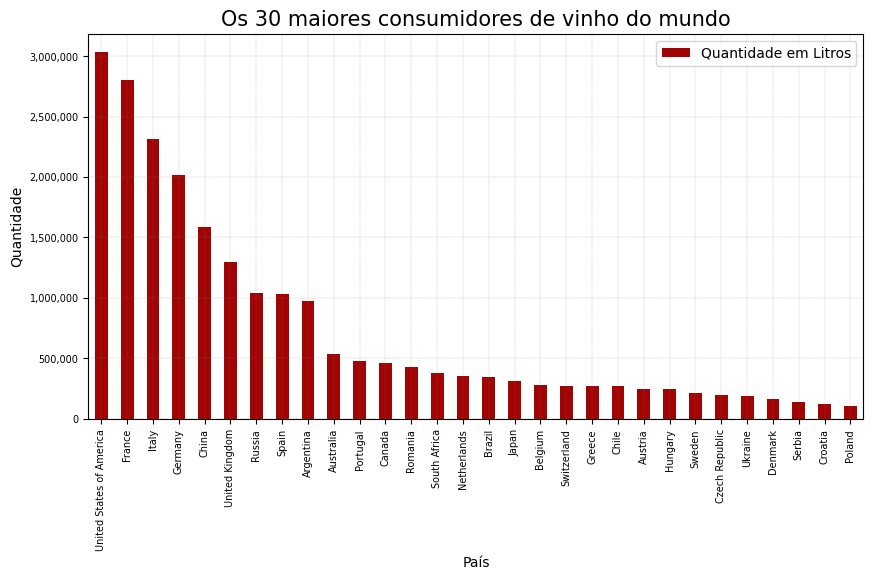

In [15]:
grafico = media_consumo_30_maiores_consumidores.plot(kind="bar", x="Pais", y="Quantidade", figsize=(10,5), color="#a20303")
plt.title("Os 30 maiores consumidores de vinho do mundo", fontsize=15)
plt.xlabel("País", fontsize=10)
plt.ylabel("Quantidade", fontsize=10)
plt.grid(linestyle=":", color="gray", linewidth=0.3)
plt.yticks(fontsize=7)
plt.xticks(rotation=90, fontsize=7)
plt.legend(labels=["Quantidade em Litros"])
grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Olhando agora pela ótica de negócio consumo não necessariamente significa que tal país seja um grande importador. Por isso vamos relacionar nessa próxima etapa o consumo do país com os dados de importação de cada um deles.

In [16]:
importacao.head()

,Pais,Ano,Quantidade
0,Afghanistan,2006,900.0
1,Afghanistan,2007,1000.0
2,Afghanistan,2008,100.0
3,Afghanistan,2009,300.0
4,Afghanistan,2010,200.0


Assim como no consumo, nossos dados nos trazem a informação de importação nos últimos 15 anos de cada país. Para entendermos quem são os maiores importadores de vinho precisamos calcular a média de importação dos países nos últimos 15 anos. Além disso iremos excluir países que possuem sua média de importação zerada e também a coluna ano já que lidaremos com a média dos anos. E por fim ordenar os países de acordo com seu consumo.

In [17]:
importacao_sem_ano = importacao.drop("Ano", axis=1)
importacao_sem_ano

,Pais,Quantidade
0,Afghanistan,900.0
1,Afghanistan,1000.0
2,Afghanistan,100.0
3,Afghanistan,300.0
4,Afghanistan,200.0
...,...,...
3355,Zimbabwe,900.0
3356,Zimbabwe,2500.0
3357,Zimbabwe,300.0
3358,Zimbabwe,300.0


In [18]:
media_importacao = importacao_sem_ano.groupby(["Pais"]).mean().round(2)
media_importacao

,Quantidade
Pais,
Afghanistan,218.75
Albania,3562.50
Algeria,5712.50
American Samoa,12.50
Angola,86762.50
...,...
Vietnam,8131.25
Virgin Islands,225.00
Yemen,0.00


In [19]:
media_importacao = media_importacao.sort_values("Quantidade", ascending=False)
media_importacao

,Quantidade
Pais,
Global,9867768.75
Germany,1483812.50
United Kingdom,1298131.25
United States of America,1068143.75
France,643743.75
...,...
Belgium and Luxemburg,0.00
Somalia,0.00
Martinique,0.00


In [20]:
media_importacao = media_importacao.query("Quantidade != 0.00").reset_index()
media_importacao

,Pais,Quantidade
0,Global,9867768.75
1,Germany,1483812.50
2,United Kingdom,1298131.25
3,United States of America,1068143.75
4,France,643743.75
...,...,...
193,Saint Helena,18.75
194,Iran,18.75
195,American Samoa,12.50
196,Kiribati,6.25


In [21]:
importacao_global = media_importacao.query("Pais == 'Global'")
importacao_global

,Pais,Quantidade
0,Global,9867768.75


Podemos ver que em nossa base o primeiro valor se refere a importacao global. Nesse momento esse dado não nos é interessante, por isso removeremos esse dado de nosso dataframe.

In [22]:
media_importacao.drop(0, inplace=True)
media_importacao

,Pais,Quantidade
1,Germany,1483812.50
2,United Kingdom,1298131.25
3,United States of America,1068143.75
4,France,643743.75
5,Russia,470456.25
...,...,...
193,Saint Helena,18.75
194,Iran,18.75
195,American Samoa,12.50
196,Kiribati,6.25


Indo por uma abordagem similar à utilizada no consumo. Olharemos para os 30 maiores importadores de vinhos dos últimos 15 anos para tentar obter alguma informação que possa nos direcionar a oportunidades.

In [23]:
media_importacao["Participação na Importação Global"] = media_importacao["Quantidade"].map(lambda x: x/importacao_global["Quantidade"][0] *100).round(2)
media_importacao

,Pais,Quantidade,Participação na Importação Global
1,Germany,1483812.50,15.04
2,United Kingdom,1298131.25,13.16
3,United States of America,1068143.75,10.82
4,France,643743.75,6.52
5,Russia,470456.25,4.77
...,...,...,...
193,Saint Helena,18.75,0.00
194,Iran,18.75,0.00
195,American Samoa,12.50,0.00
196,Kiribati,6.25,0.00


In [24]:
media_importacao["Participação na Importação Global"][0:30].sum().round(2)

89.84

E assim como no consumo, podemos observar que quase 90% da importação de vinhos mundial está concentrada em apenas 30 países. Os quais podem ser observados no gráfico a seguir.

In [25]:
media_importacao_30_maiores_importadores = media_importacao.iloc[0:30,:]

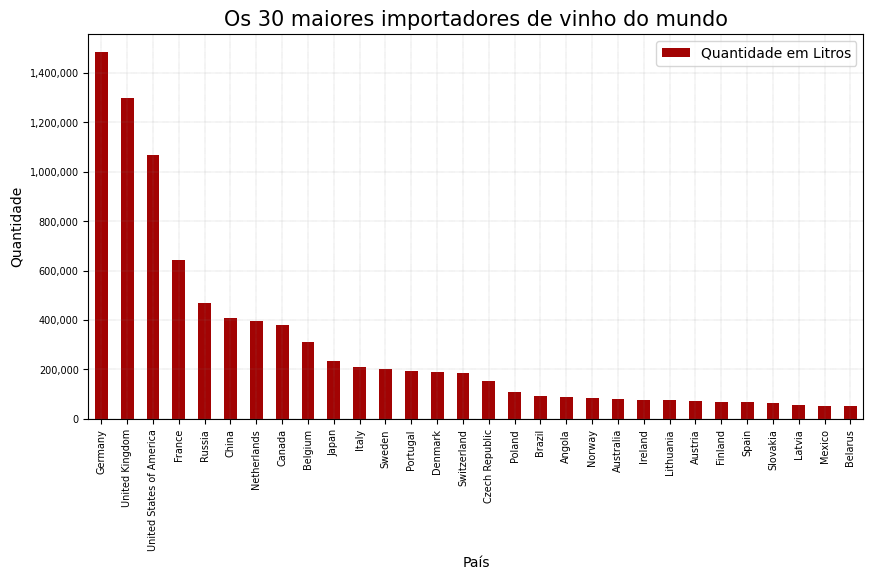

In [26]:
grafico = media_importacao_30_maiores_importadores.plot(kind="bar", x="Pais", y="Quantidade", figsize=(10,5), color="#a20303")
plt.title("Os 30 maiores importadores de vinho do mundo", fontsize=15)
plt.xlabel("País", fontsize=10)
plt.ylabel("Quantidade", fontsize=10)
plt.grid(linestyle=":", color="gray", linewidth=0.3)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.legend(labels=["Quantidade em Litros"])
grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Ao cruzar os dados de ambos os gráficos, podemos ver que há alguns países que figuraram entre os 30 maiores em ambos os gráficos. Ou seja, reunem as duas características avaliadas até o momento, o que os tornam excelentes candidatos a oferecer oportunidades de negócio. A tabela a seguir nos mostra essa lista.

In [27]:
consolidado = media_importacao_30_maiores_importadores
consolidado.drop("Quantidade", inplace=True, axis=1)

C:\Users\gusta\AppData\Local\Temp\ipykernel_20432\181437656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidado.drop("Quantidade", inplace=True, axis=1)


In [28]:
media_consumo_30_maiores_consumidores.set_index("Pais", inplace=True)
media_importacao_30_maiores_importadores.set_index("Pais", inplace=True)

In [29]:
consolidado = pd.concat([media_importacao_30_maiores_importadores, media_consumo_30_maiores_consumidores], axis=1)
consolidado.drop("Quantidade", inplace=True, axis=1)
consolidado.dropna(inplace=True)
consolidado.reset_index(inplace=True)
consolidado

,Pais,Participação na Importação Global,Participação no Consumo Global
0,Germany,15.04,8.35
1,United Kingdom,13.16,5.36
2,United States of America,10.82,12.54
3,France,6.52,11.60
4,Russia,4.77,4.29
5,China,4.12,6.56
6,Netherlands,4.02,1.45
7,Canada,3.84,1.90
8,Belgium,3.16,1.16
9,Japan,2.37,1.28


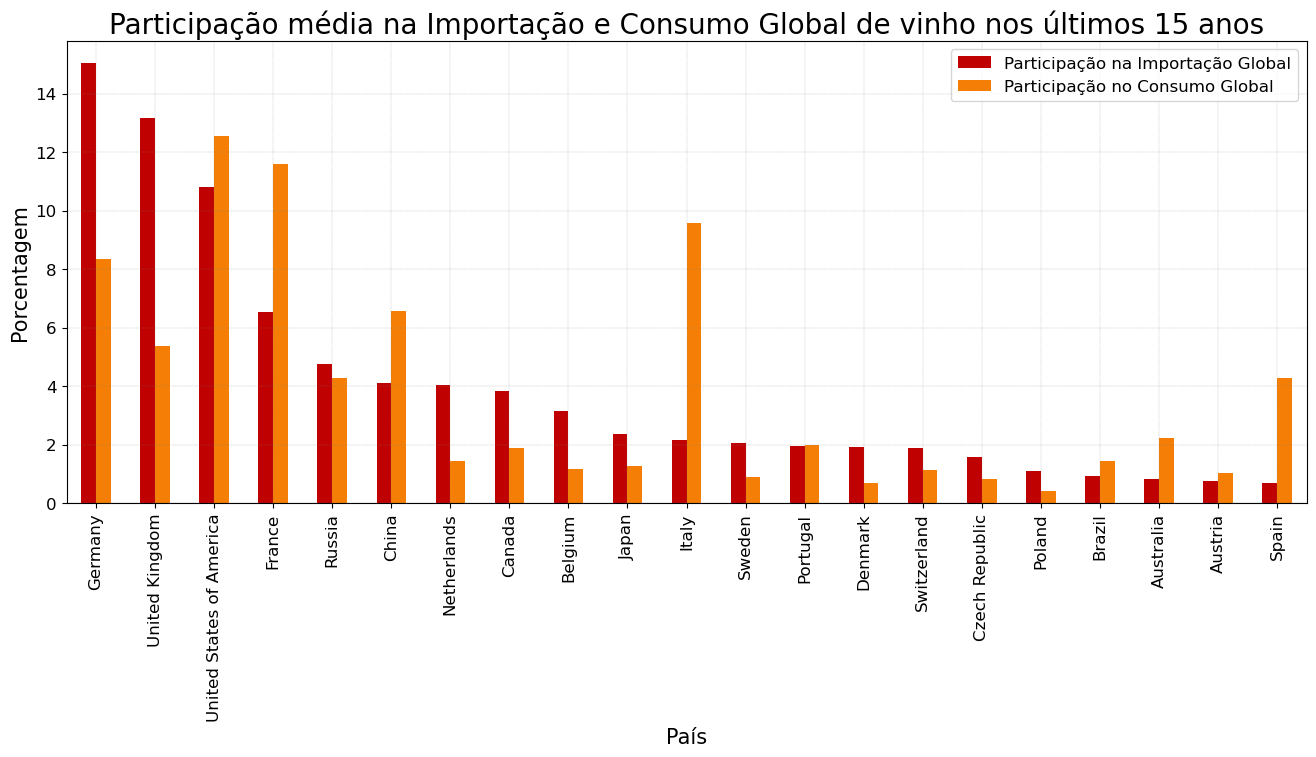

In [140]:
consolidado.plot(kind="bar", x="Pais", figsize=(16,6), color = ['#C00101','#F57F06'])
plt.title("Participação média na Importação e Consumo Global de vinho nos últimos 15 anos", fontsize=20)
plt.xlabel("País", fontsize=15)
plt.ylabel("Porcentagem", fontsize=15)
plt.grid(linestyle=":", color="gray", linewidth=0.3)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Um excelente modo de se observar o potencial de mercado que um país tem é comparar seu consumo com sua capacidade de produção. Entendemos que outros fatores podem influenciar nessa análise, como por exemplo um consumo específico de um tipo de vinho que o país não produz, porém cruzar esses dados já nos dará uma boa noção da existência de um déficit de produção em determinado país.

A seguir faremos a preparação da base de dados de Produção.

In [31]:
producao_sem_ano = producao.drop("Ano", axis=1)
producao_sem_ano

,Pais,Quantidade
0,Afghanistan,0.0
1,Afghanistan,0.0
2,Afghanistan,0.0
3,Afghanistan,0.0
4,Afghanistan,0.0
...,...,...
1251,Zimbabwe,2200.0
1252,Zimbabwe,2000.0
1253,Zimbabwe,1400.0
1254,Zimbabwe,1400.0


In [32]:
media_producao = producao_sem_ano.groupby(["Pais"]).mean().round(2)
media_producao

,Quantidade
Pais,
Afghanistan,0.00
Albania,18300.00
Algeria,36812.50
Argentina,1352400.00
Armenia,7137.50
...,...
United States of America,2280306.25
Uruguay,76106.25
Uzbekistan,26568.75


In [33]:
media_producao = media_producao.sort_values("Quantidade", ascending=False)
media_producao

,Quantidade
Pais,
Global,26961387.50
Italy,4828137.50
France,4486406.25
Spain,3728400.00
United States of America,2280306.25
...,...
Ireland,0.00
Libya,0.00
Sweden,0.00


In [34]:
media_producao = media_producao.query("Quantidade != 0.00").reset_index()
media_producao

,Pais,Quantidade
0,Global,26961387.50
1,Italy,4828137.50
2,France,4486406.25
3,Spain,3728400.00
4,United States of America,2280306.25
...,...,...
68,Tajikistan,443.75
69,Poland,375.00
70,Denmark,141.67
71,Panama,112.50


In [35]:
producao_global = media_producao.query("Pais == 'Global'")
producao_global

,Pais,Quantidade
0,Global,26961387.5


In [36]:
media_producao.drop(0, inplace=True)
media_producao

,Pais,Quantidade
1,Italy,4828137.50
2,France,4486406.25
3,Spain,3728400.00
4,United States of America,2280306.25
5,Argentina,1352400.00
...,...,...
68,Tajikistan,443.75
69,Poland,375.00
70,Denmark,141.67
71,Panama,112.50


In [37]:
media_producao["Participação na Produção Global"] = media_producao["Quantidade"].map(lambda x: x/producao_global["Quantidade"][0] *100).round(2)
media_producao

,Pais,Quantidade,Participação na Produção Global
1,Italy,4828137.50,17.91
2,France,4486406.25,16.64
3,Spain,3728400.00,13.83
4,United States of America,2280306.25,8.46
5,Argentina,1352400.00,5.02
...,...,...,...
68,Tajikistan,443.75,0.00
69,Poland,375.00,0.00
70,Denmark,141.67,0.00
71,Panama,112.50,0.00


In [38]:
media_producao["Participação na Produção Global"][0:30].sum().round(2)

97.52

O mesmo comportamento que observamos com a Importação e Consumo se repete com a Produção. Apenas 30 países são responsáveis por aproximadamente 98% da produção mundial de vinho. Os países que entram nessa lista podem ser observados no gráfico a seguir.

In [39]:
media_producao_30_maiores_produtores = media_producao.iloc[0:30,:]

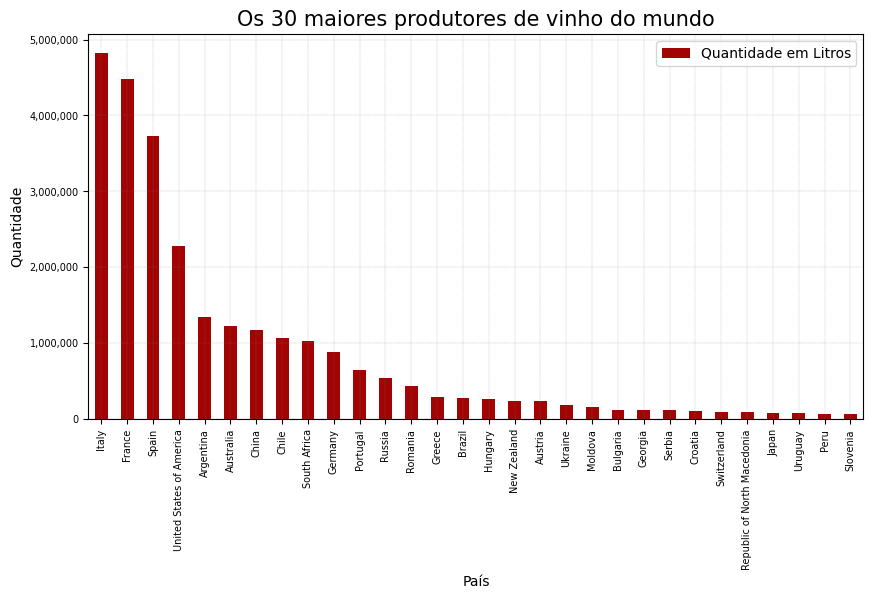

In [40]:
grafico = media_producao_30_maiores_produtores.plot(kind="bar", x="Pais", y="Quantidade", figsize=(10,5), color="#a20303")
plt.title("Os 30 maiores produtores de vinho do mundo", fontsize=15)
plt.xlabel("País", fontsize=10)
plt.ylabel("Quantidade", fontsize=10)
plt.grid(linestyle=":", color="gray", linewidth=0.3)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.legend(labels=["Quantidade em Litros"])
grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Vamos agora cruzar os dados de Produção com Consumo a fim de identificar os déficits mencionados anteriormente.

In [41]:
producao_consumo = media_consumo_30_maiores_consumidores
producao_consumo.drop("Participação no Consumo Global", inplace=True, axis=1)
media_producao.drop("Participação na Produção Global", inplace=True, axis=1)

C:\Users\gusta\AppData\Local\Temp\ipykernel_20432\1722628769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producao_consumo.drop("Participação no Consumo Global", inplace=True, axis=1)


In [42]:
media_producao.set_index("Pais", inplace=True)

producao_consumo.columns = ["Consumo"]
media_producao.columns = ["Produção"]
media_consumo_30_maiores_consumidores

,Consumo
Pais,
United States of America,3032212.50
France,2805050.00
Italy,2314362.50
Germany,2017868.75
China,1585325.00
United Kingdom,1296775.00
Russia,1036675.00
Spain,1034556.25
Argentina,978375.00


In [43]:
producao_consumo = pd.concat([producao_consumo, media_producao], axis=1)
producao_consumo.dropna(inplace=True)
producao_consumo.reset_index(inplace=True)
producao_consumo

,Pais,Consumo,Produção
0,United States of America,3032212.50,2280306.25
1,France,2805050.00,4486406.25
2,Italy,2314362.50,4828137.50
3,Germany,2017868.75,885562.50
4,China,1585325.00,1170412.50
5,United Kingdom,1296775.00,4056.25
6,Russia,1036675.00,538781.25
7,Spain,1034556.25,3728400.00
8,Argentina,978375.00,1352400.00
9,Australia,535375.00,1226743.75


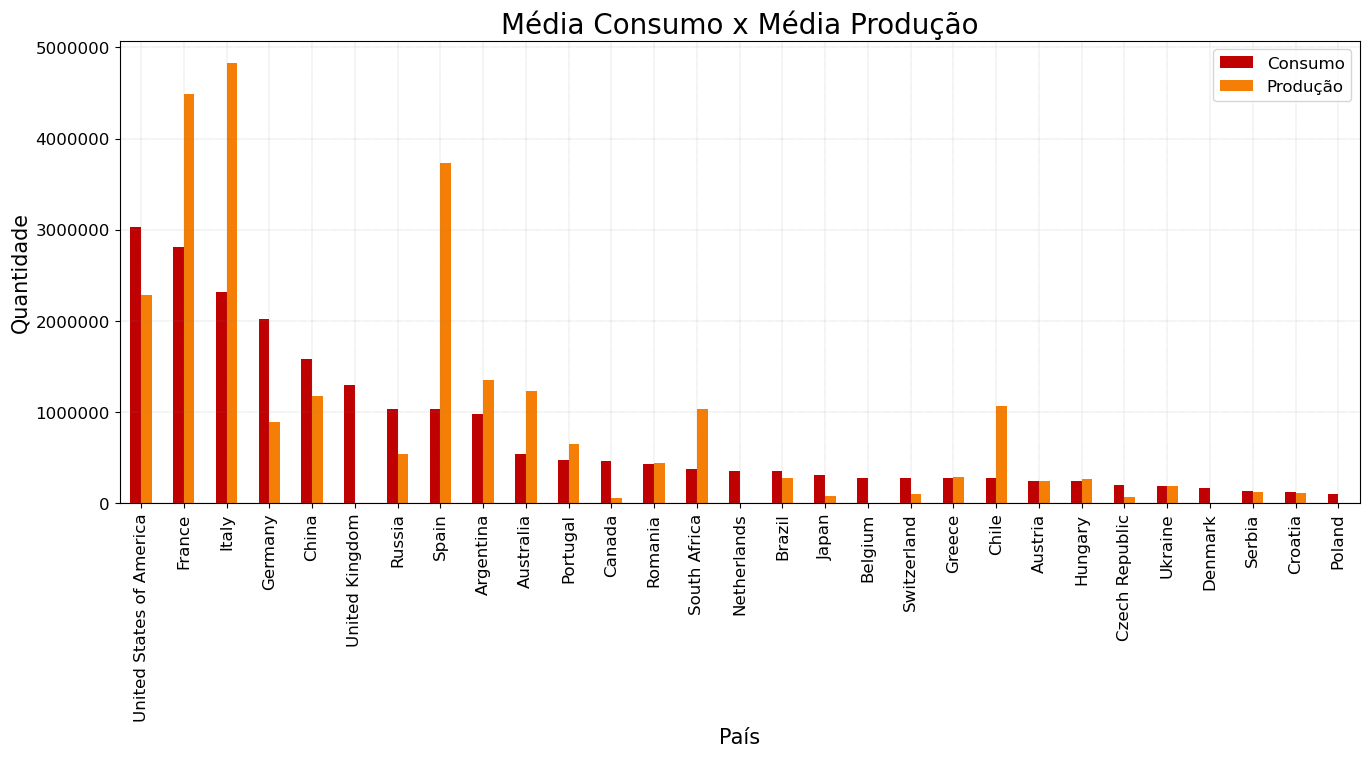

In [141]:
producao_consumo.plot(kind="bar", x="Pais", figsize=(16,6), color = ['#C00101','#F57F06'])
plt.title("Média Consumo x Média Produção", fontsize=20)
plt.xlabel("País", fontsize=15)
plt.ylabel("Quantidade", fontsize=15)
plt.grid(linestyle=":", color="gray", linewidth=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Como podemos observar França, Itália, Espanha, Argentina, Austrália, Portugal, África do Sul, Romênia, Grécia e Chile possuem uma produção média muito maior do que seu consumo médio o que pode evitar ou dificultar o surgimento de oportunidades de negócio para esses países.

Por outro lado, podemos também observar que há um déficit de produção para **Estados Unidos, Alemanha, China, Reino Unido, Russia, Canada, Holanda, Brasil, Japão, Bélgica, Suíça, Dinamarca, Polônia e República Tcheca**.

Agora que restringimos nossa área de busca aos candidatos mais promissores, podemos olhar com mais calma para o contexto de cada um. 

A seguir plotaremos um gráfico para cada país mostrando a evolução da Importação e Consumo nos últimos 15 anos.

In [45]:
importacao.columns = ["Pais", "Ano", "Importação"]
consumo.columns = ["Pais", "Ano", "Consumo"]

In [125]:
def plota_pais(pais):
    pais_importacao = importacao.query("Pais == @pais")
    pais_importacao.set_index("Ano", inplace=True)
    pais_consumo = consumo.query("Pais == @pais")
    pais_consumo.set_index("Ano", inplace=True)
    tabela_geral = pd.concat([pais_importacao, pais_consumo], axis=1)
    tabela_geral.drop("Pais", axis=1, inplace=True)
    
    chart = tabela_geral.plot(kind="line", figsize=(9,5))
    plt.title(pais, fontsize=15)
    plt.xlabel("Ano", fontsize=10)
    plt.ylabel("Quantidade em Litros", fontsize=10)
    plt.grid(linestyle=":", color="gray", linewidth=0.3)
    plt.yticks(fontsize=7)
    plt.ticklabel_format(style='plain', axis='y')
    #tabela_geral.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
    chart.legend(bbox_to_anchor = (1.22, 1.01), title = "Legenda")
    plt.show()

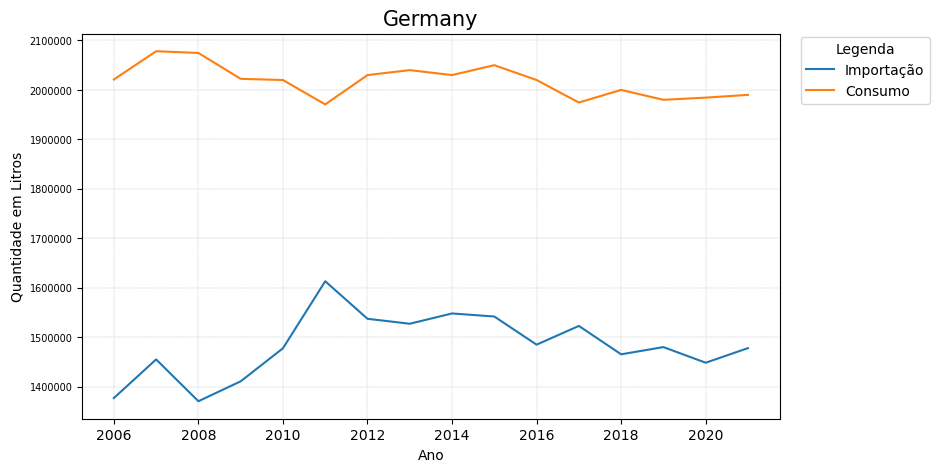

In [89]:
#for pais in consolidado["Pais"]:
#    plota_pais(pais)

plota_pais("Germany")

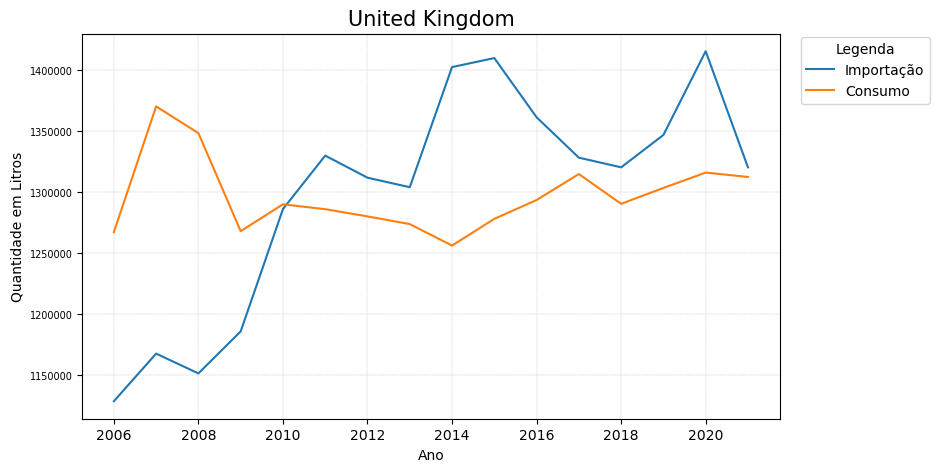

In [90]:
plota_pais("United Kingdom")

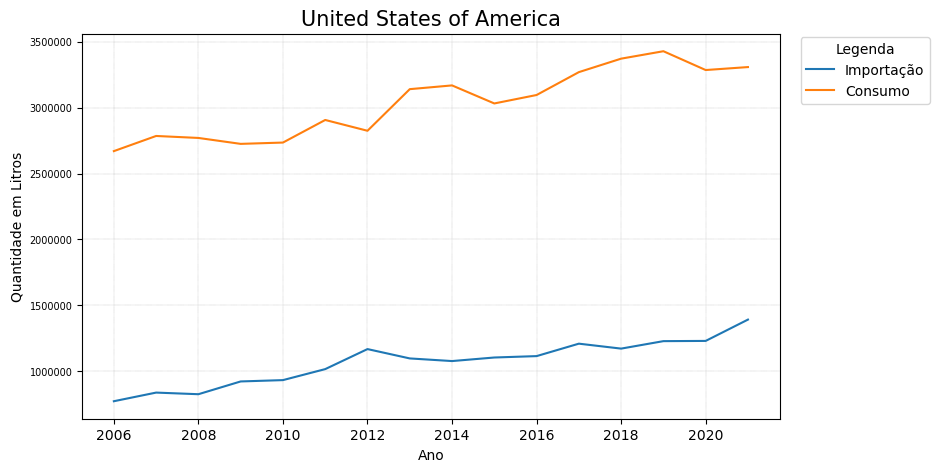

In [91]:
plota_pais("United States of America")

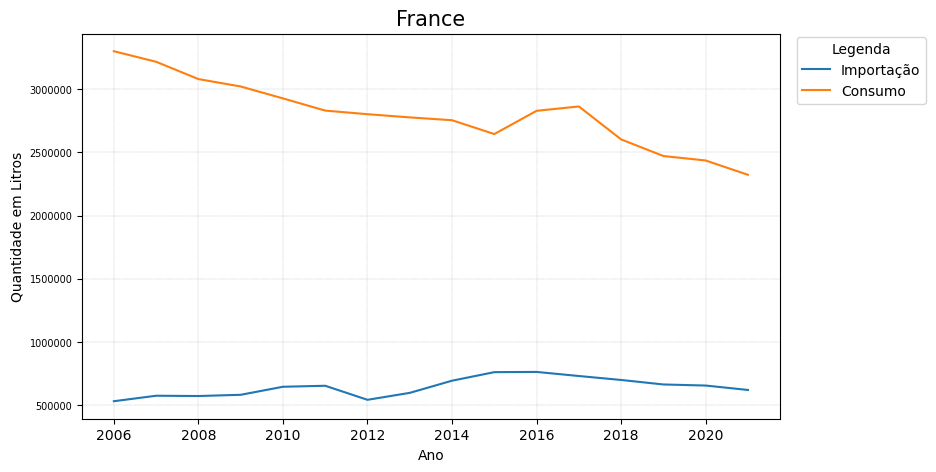

In [126]:
plota_pais("France")

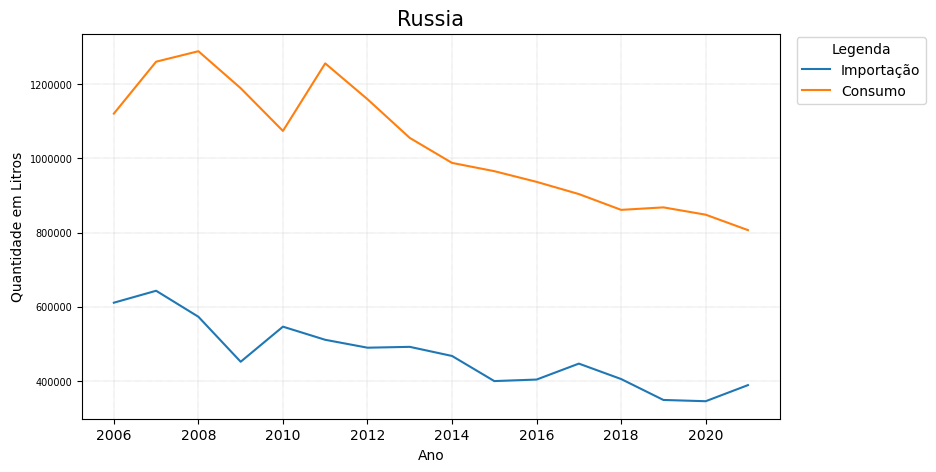

In [127]:
plota_pais("Russia")

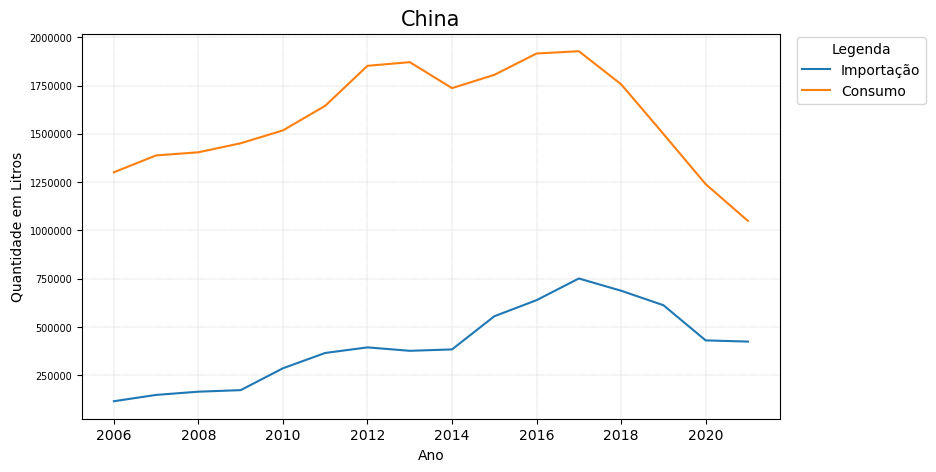

In [128]:
plota_pais("China")

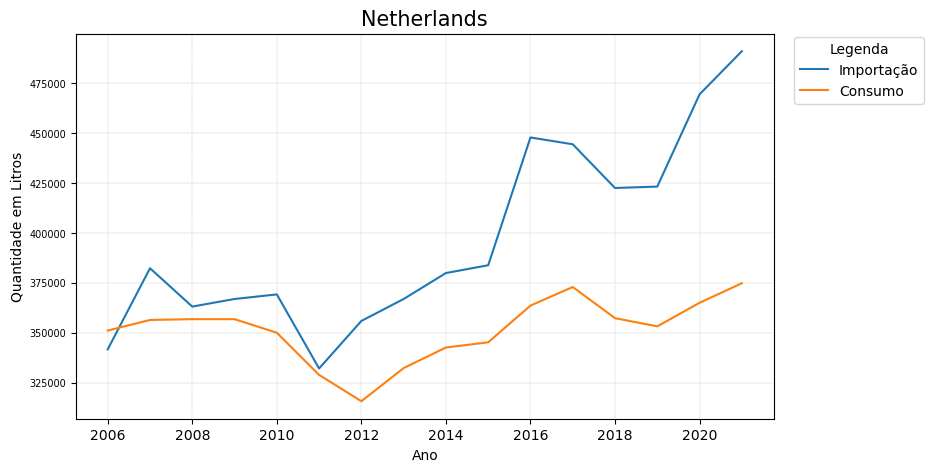

In [95]:
plota_pais("Netherlands")

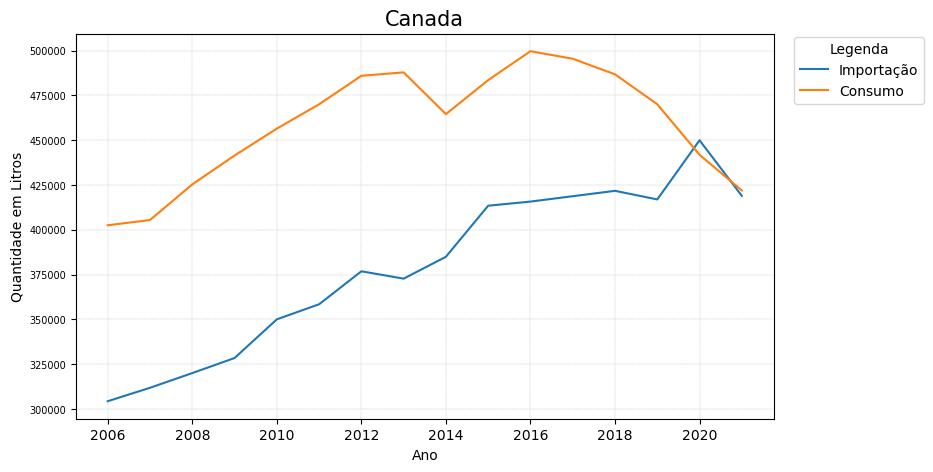

In [96]:
plota_pais("Canada")

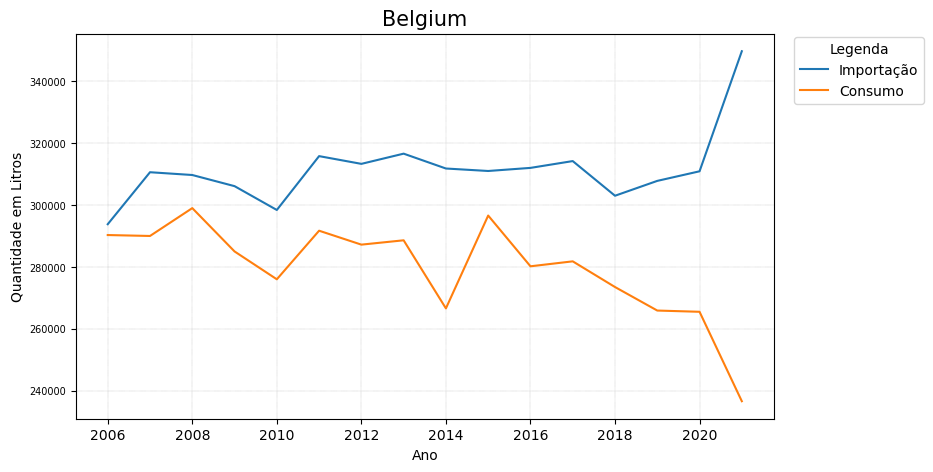

In [97]:
plota_pais("Belgium")

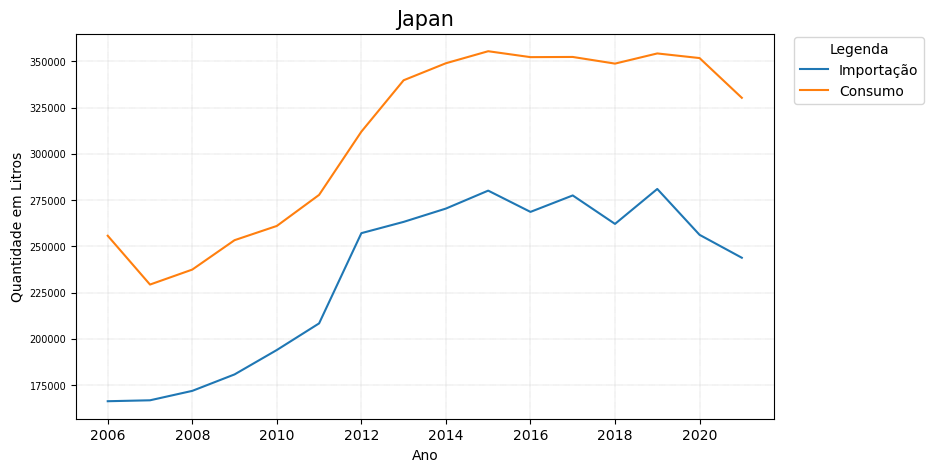

In [98]:
plota_pais("Japan")

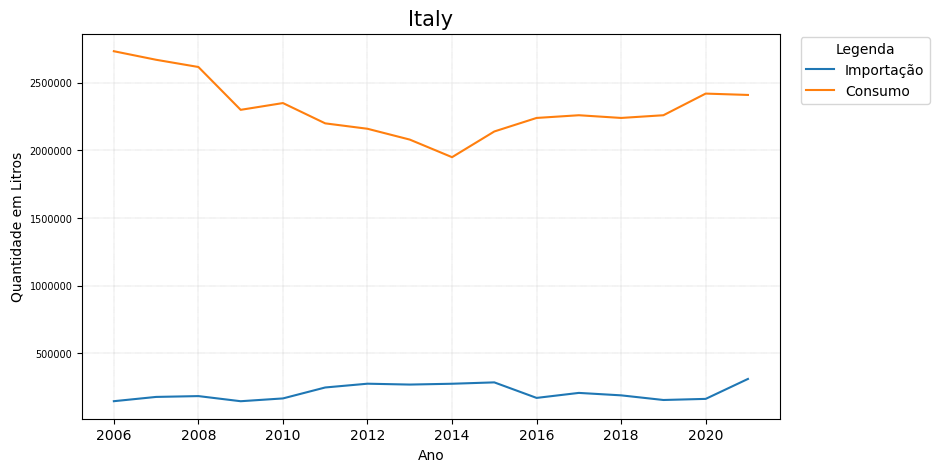

In [99]:
plota_pais("Italy")

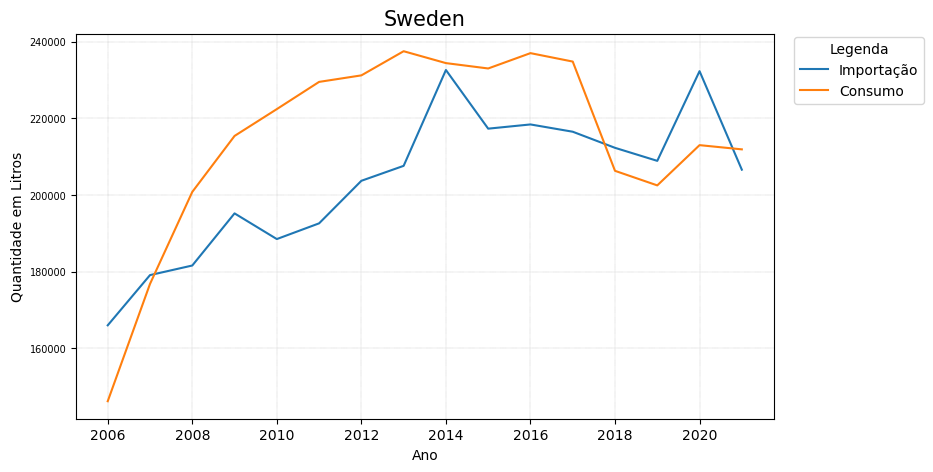

In [100]:
plota_pais("Sweden")

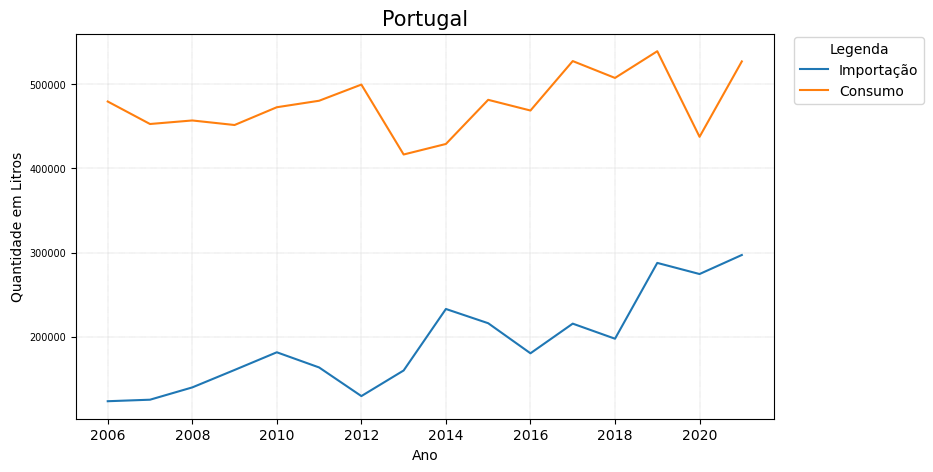

In [101]:
plota_pais("Portugal")

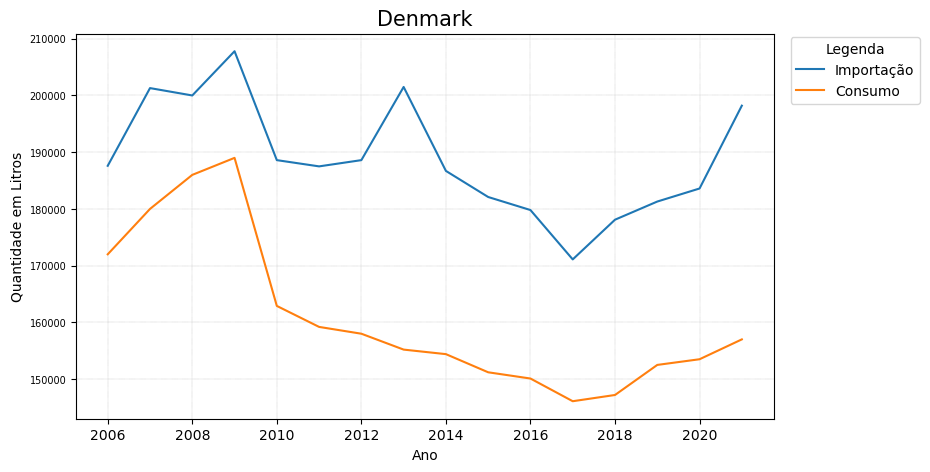

In [129]:
plota_pais("Denmark")

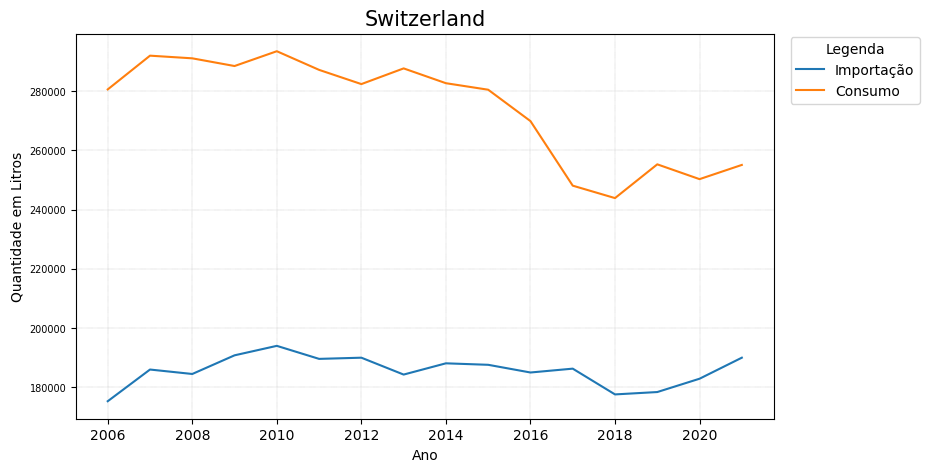

In [130]:
plota_pais("Switzerland")

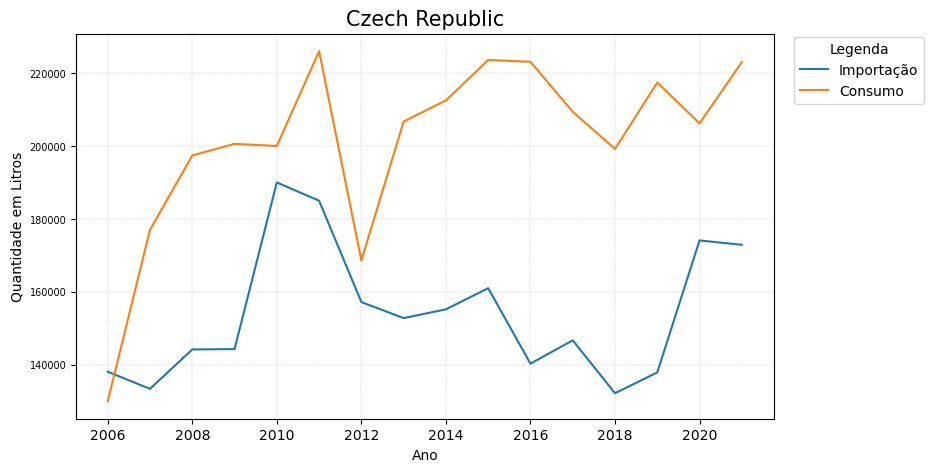

In [104]:
plota_pais("Czech Republic")

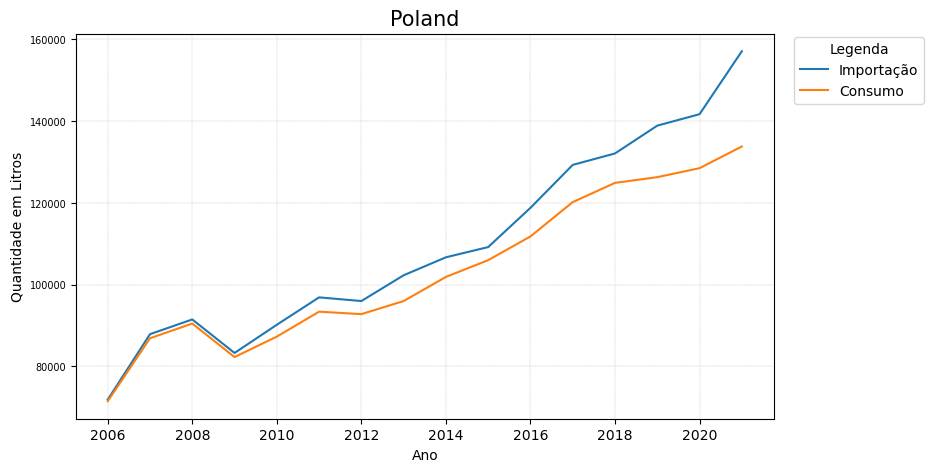

In [105]:
plota_pais("Poland")

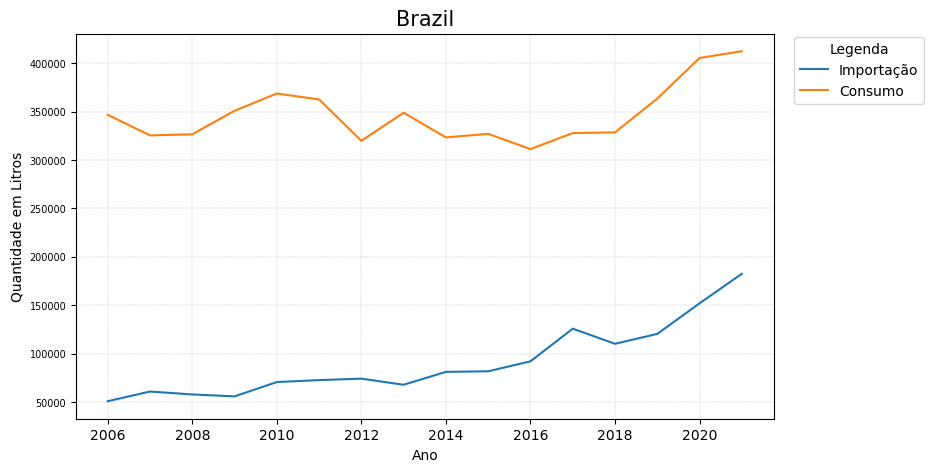

In [106]:
plota_pais("Brazil")

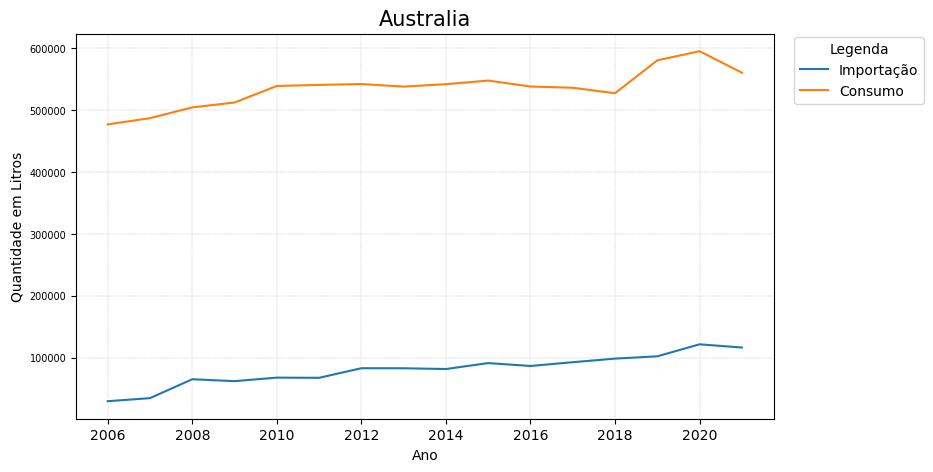

In [107]:
plota_pais("Australia")

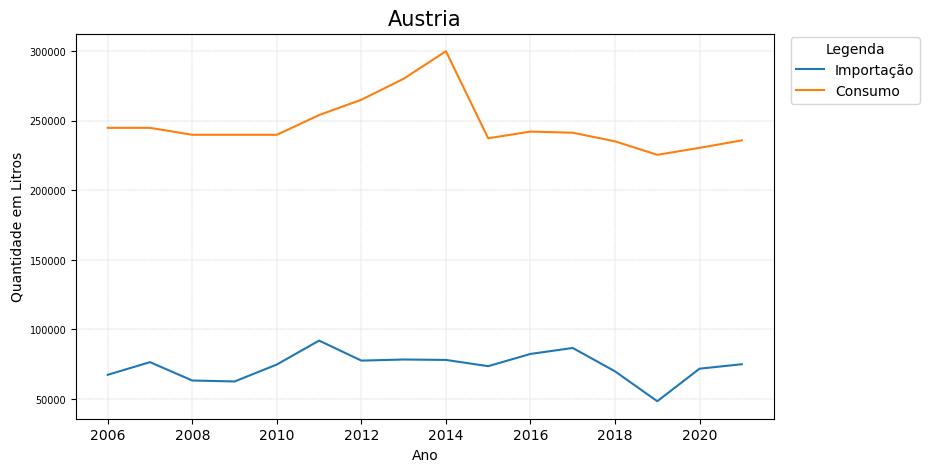

In [131]:
plota_pais("Austria")

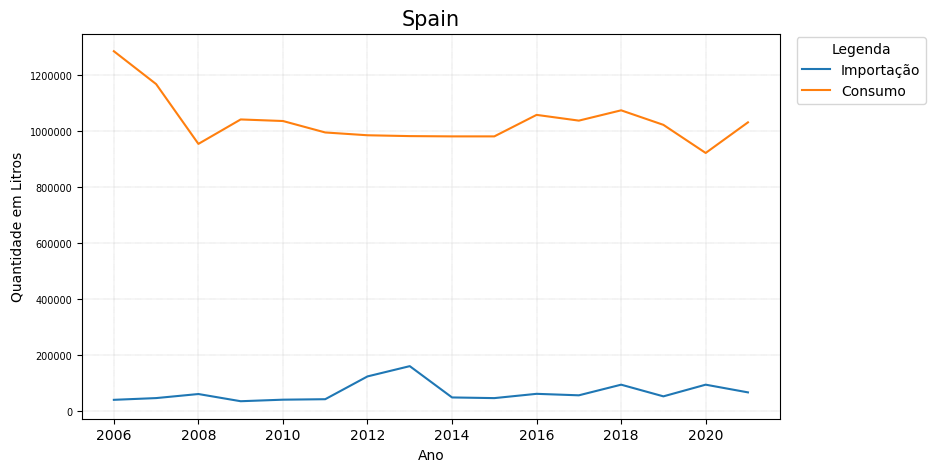

In [132]:
plota_pais("Spain")

O objetivo por trás da análise dos gráficos acima não é o comparar os números entre os países, até porque já sabemos quem são os maiores consumidores e importadores nos últimos 15 anos, e além disso, as escalas de cada gráfico se encontram diferentes. A ideia nesse cenário é entender a evolução desses números ao longo do tempo. Se há ou não uma tendência de alta tanto na importação quanto no consumo que possa nos levar a acreditar que haverá oportunidades de novos negócios para determinado país. 

Conseguimos observar que para Austrália, Brasil, Polônia, Portugal, Suécia, Canada, Holanda e Estados Unidos o consumo e a importação vem aumentando ao longo dos anos. Portanto são os primeiros países a serem fortemente recomendados, com base nessas duas caracteristicas, a serem mercados alvo. Principalmente Brasil, Polônia, Portugal, Holanda e Canada que estão apresentando uma tendência de aumento nesses dois quesitos ainda mais acentuado.

Dentre estes países Brasil, Polônia, Canada, Holanda e Estados Unidos estão em deficit de produção, como mencionado por nossa análise acima, fazendo com que estes tenham as 3 características (Grande consumidor, Grande importador e não consegue suprir sua demanda com produção interna) que os traz ainda mais para os holofotes de nossa análise.